LAB: Visualización de datos usando Matplotlib
==========================================

In [135]:
## inicialización
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime as dt
%matplotlib inline

In [163]:
DataFrame = pd.read_csv('indicadores-mundiales.csv',
                    sep=',', encoding='latin-1')
DataFrame.loc[DataFrame['Region'] == 'africa','Region'] = "Africa"
DataFrame['Ano'] = pd.to_datetime(DataFrame['Ano'])
DataFrame['AnoUnico']= DataFrame[['Ano']].apply(lambda x: dt.datetime.strftime(x['Ano'], '%Y'), axis=1)
DataFramePoblacionSuma = DataFrame.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
DataFramePoblacionSumaPorcentaje = DataFramePoblacionSuma.copy()
SumaPorRegion = DataFramePoblacionSumaPorcentaje.sum(axis = 0, skipna = True) 

DataFrameSumaGastos = DataFrame.groupby(['Region','AnoUnico']).agg({'Gasto en salud (per capita)': np.mean}) 

DataFrameDataFramePoblacionPromedio14 = DataFrame.groupby(['Region','AnoUnico']).agg({'Poblacion 0-14': np.mean}) 
DataFrameDataFramePoblacionPromedio64 = DataFrame.groupby(['Region','AnoUnico']).agg({'Poblacion 15-64': np.mean}) 
DataFrameDataFramePoblacionPromedio65 = DataFrame.groupby(['Region','AnoUnico']).agg({'Poblacion 65+': np.mean}) 


## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


Text(0, 0.5, 'Valor')

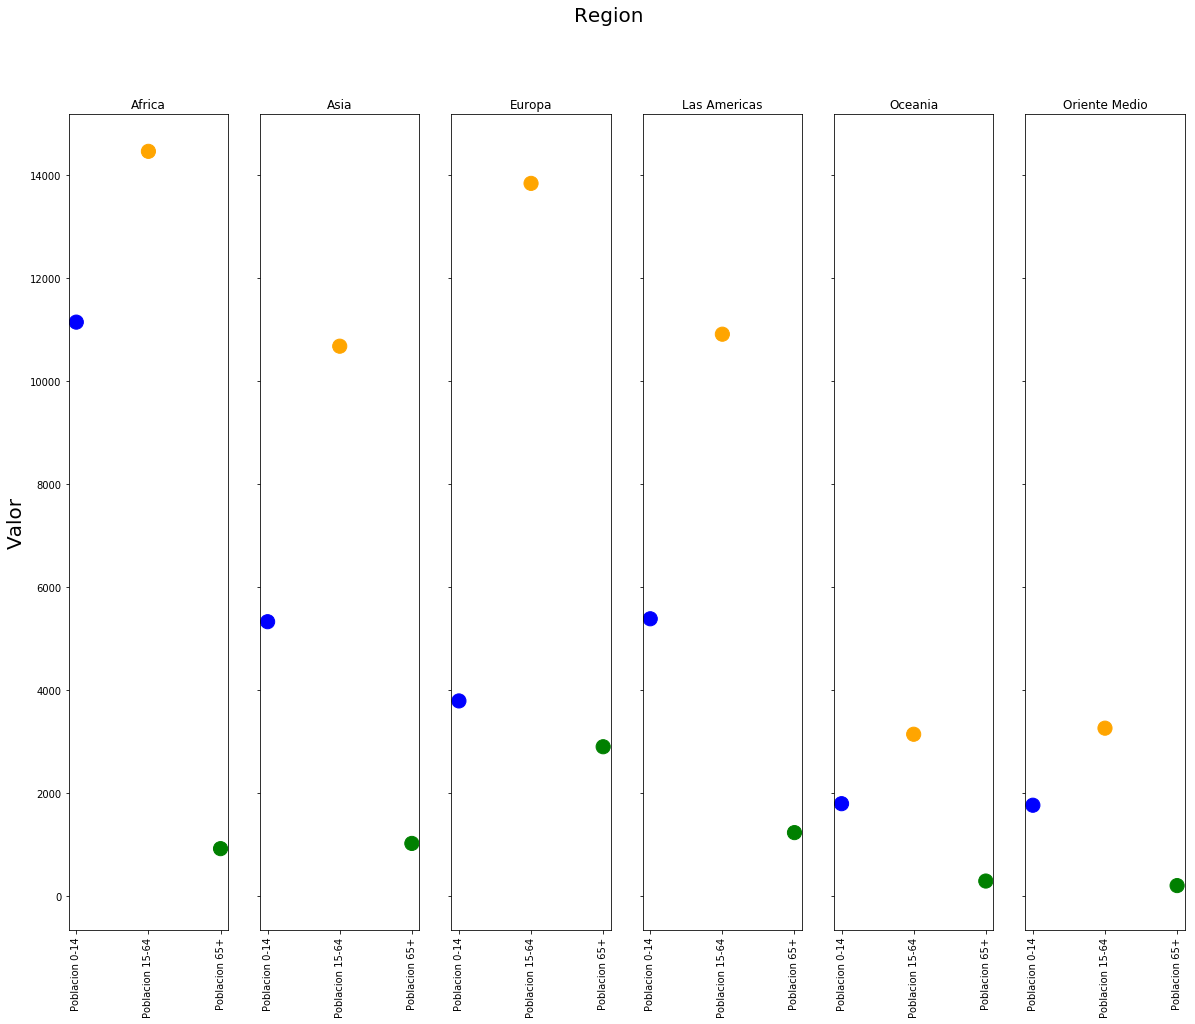

In [151]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap = DataFrameGrap[['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(1, len(indices), figsize=(20, 15), sharey=True)
for indice in indices:
    DataFrameDeIndice = (DataFrameGrap.loc[indice,:])
    data = pd.Series.to_dict(DataFrameDeIndice)
    names = list(data.keys())
    values = list(data.values())
    axs[contador].scatter(names, values,[200,200,200],c=my_colors)
    axs[contador].set_xticklabels(names,rotation='vertical')
    axs[contador].title.set_text(indice)
    contador+=1
fig.suptitle('Region', fontsize=20)
axs[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


[11136.2, 14452.699999999992, 911.7000000000003]
[5318.5999999999985, 10668.699999999999, 1013.0000000000001]
[3780.200000000001, 13830.599999999999, 2890.500000000002]
[5375.500000000002, 10901.799999999996, 1223.1]
[1784.8, 3133.1000000000004, 282.50000000000006]
[1754.7000000000003, 3251.1000000000004, 194.20000000000005]


Text(0, 0.5, 'Valor')

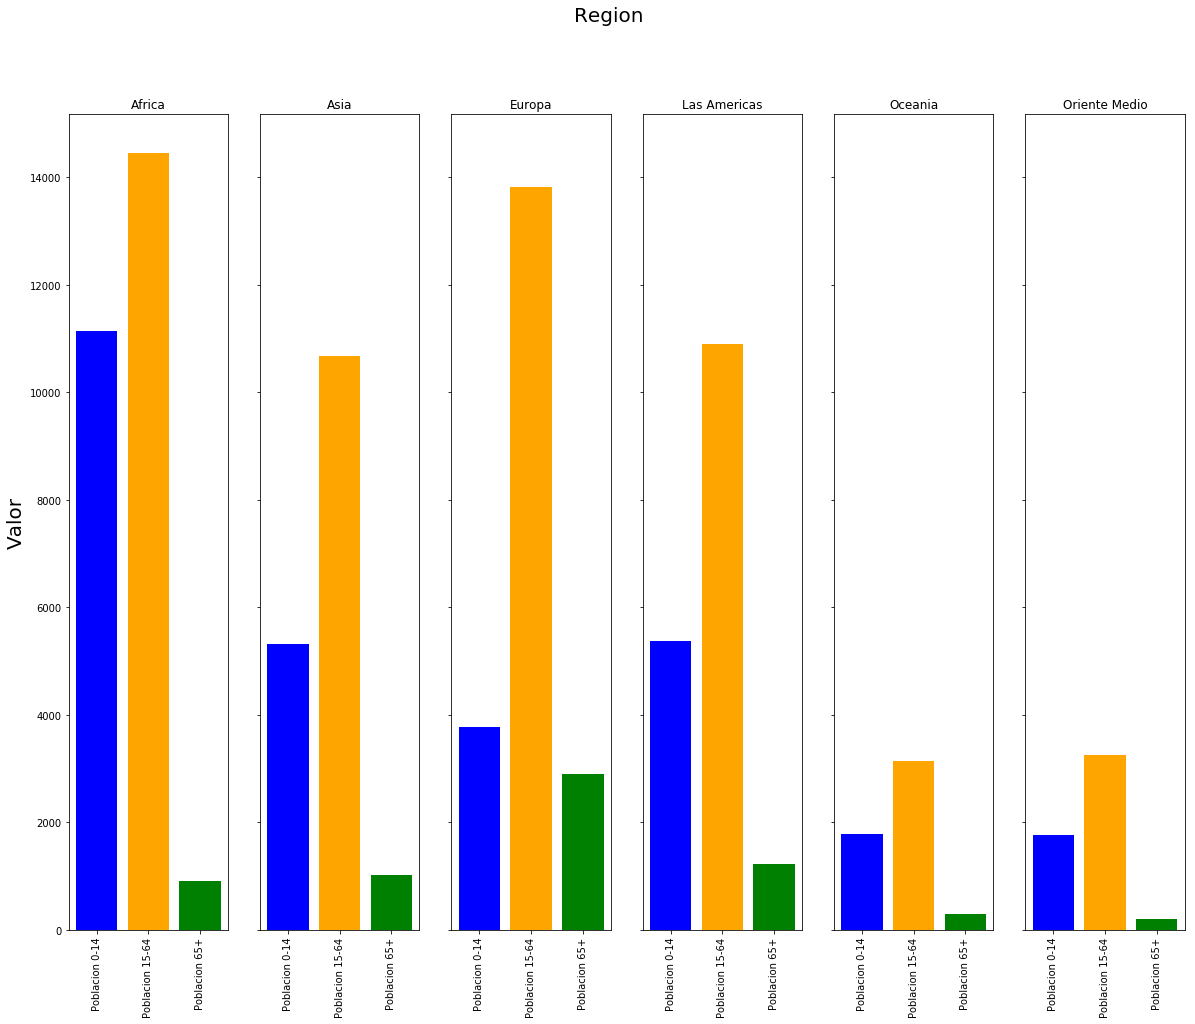

In [9]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap = DataFrameGrap[['Poblacion 0-14','Poblacion 15-64','Poblacion 65+']]
indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(1, len(indices), figsize=(20, 15), sharey=True)
for indice in indices:
    DataFrameDeIndice = (DataFrameGrap.loc[indice,:])
    data = pd.Series.to_dict(DataFrameDeIndice)
    names = list(data.keys())
    values = list(data.values())
    axs[contador].bar(names, values,color=my_colors)
    axs[contador].set_xticklabels(names,rotation='vertical')
    axs[contador].title.set_text(indice)
    contador+=1
fig.suptitle('Region', fontsize=20)
axs[0].set_ylabel(ylabel='Valor',fontsize=20)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

Text(0.5, 0.98, 'Region')

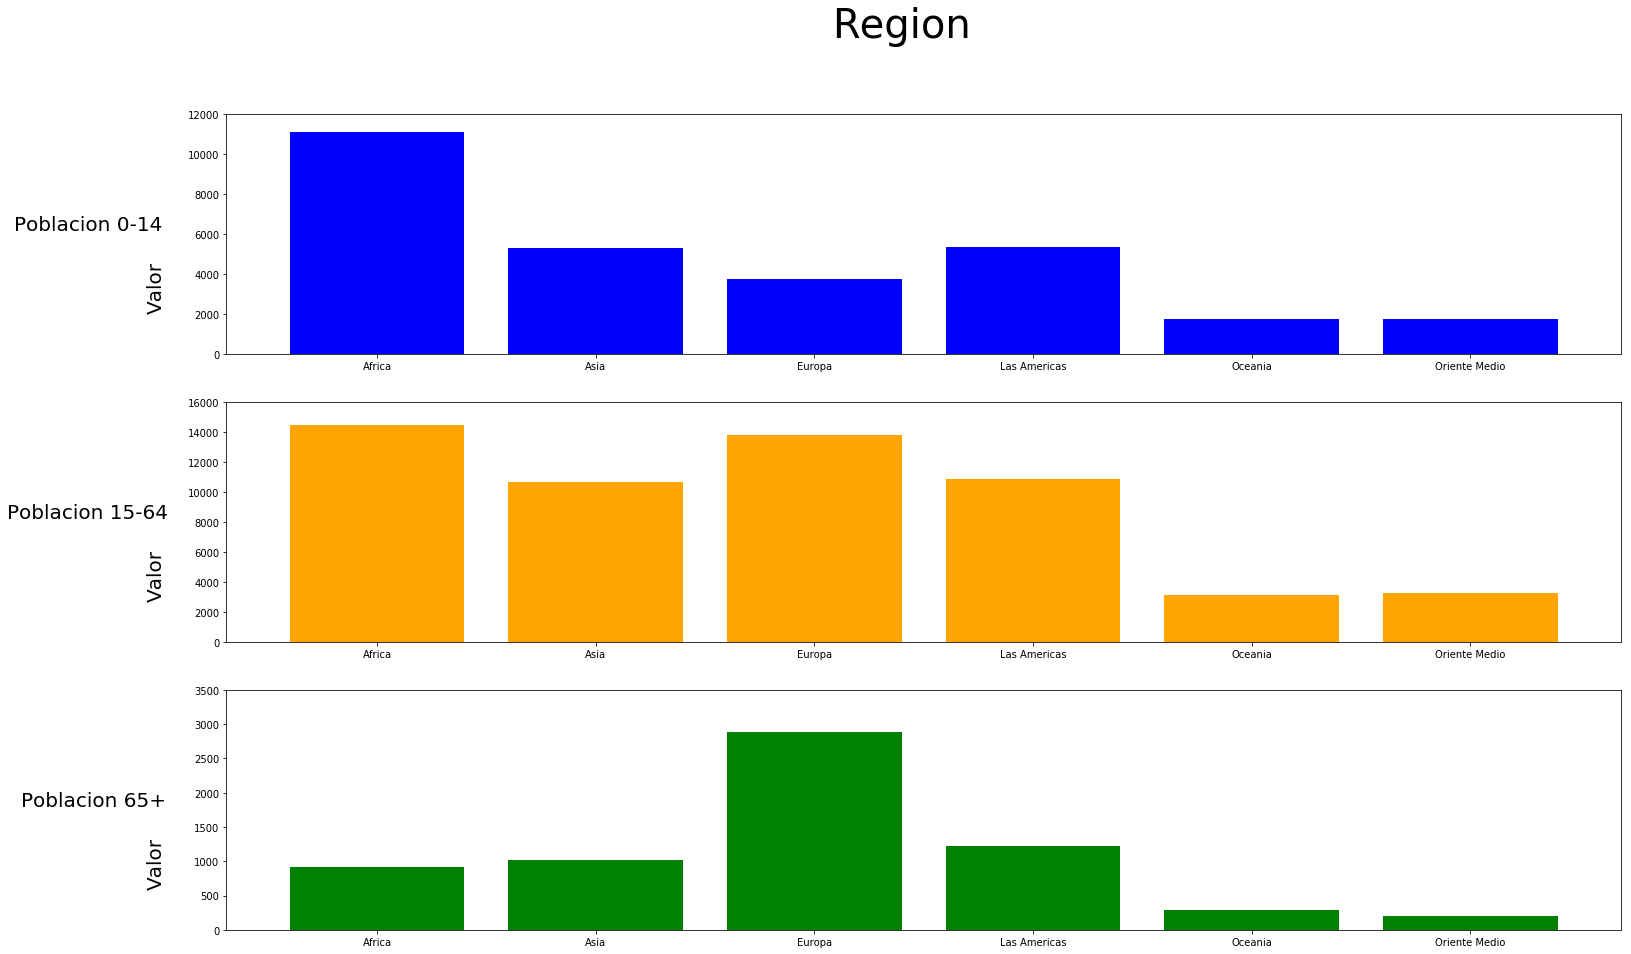

In [92]:
DataFrameGrap = DataFramePoblacionSumaPorcentaje.copy()
DataFrameGrap14 = DataFrameGrap[['Poblacion 0-14']]
DataFrameGrap64 = DataFrameGrap[['Poblacion 15-64']]
DataFrameGrap65 = DataFrameGrap[['Poblacion 65+']]

indices = (DataFrameGrap.index.values)
contador = 0
my_colors = ['blue','orange','green']
fig, axs = plt.subplots(3, 1, figsize=(25, 15), sharey=True)


def PlotGrafica(DataFrame,Indice,Posicion,Setcolor,yInferior,ySuperior):
    DataFrameGraficar=DataFrame.reset_index()
    data = pd.Series.to_dict(DataFrameGraficar[Indice])
    dataRegion = pd.Series.to_dict(DataFrameGraficar['Region'])
    names = list(dataRegion.values())
    values = list(data.values())
    ax1 = plt.subplot(Posicion)
    ax1.bar(names, values,color=Setcolor)
    ax1.set_xticklabels(names,rotation='horizontal')
    ax1.set_ylabel(ylabel=Indice,fontsize=20,rotation='horizontal',labelpad =100)
    ax1.set_ylim([yInferior, ySuperior])
    ax1.set_title('Valor',rotation='vertical',fontsize=20,x=-0.05, y=0.3)
PlotGrafica(DataFrameGrap14,'Poblacion 0-14',311,'Blue',0,12000)
PlotGrafica(DataFrameGrap64,'Poblacion 15-64',312,'Orange',0,16000)
PlotGrafica(DataFrameGrap65,'Poblacion 65+',313,'Green',0,3500)



fig.suptitle('Region', fontsize=40)

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

Text(0, 0.5, 'Prom.Gasto en Salud (per capita)')

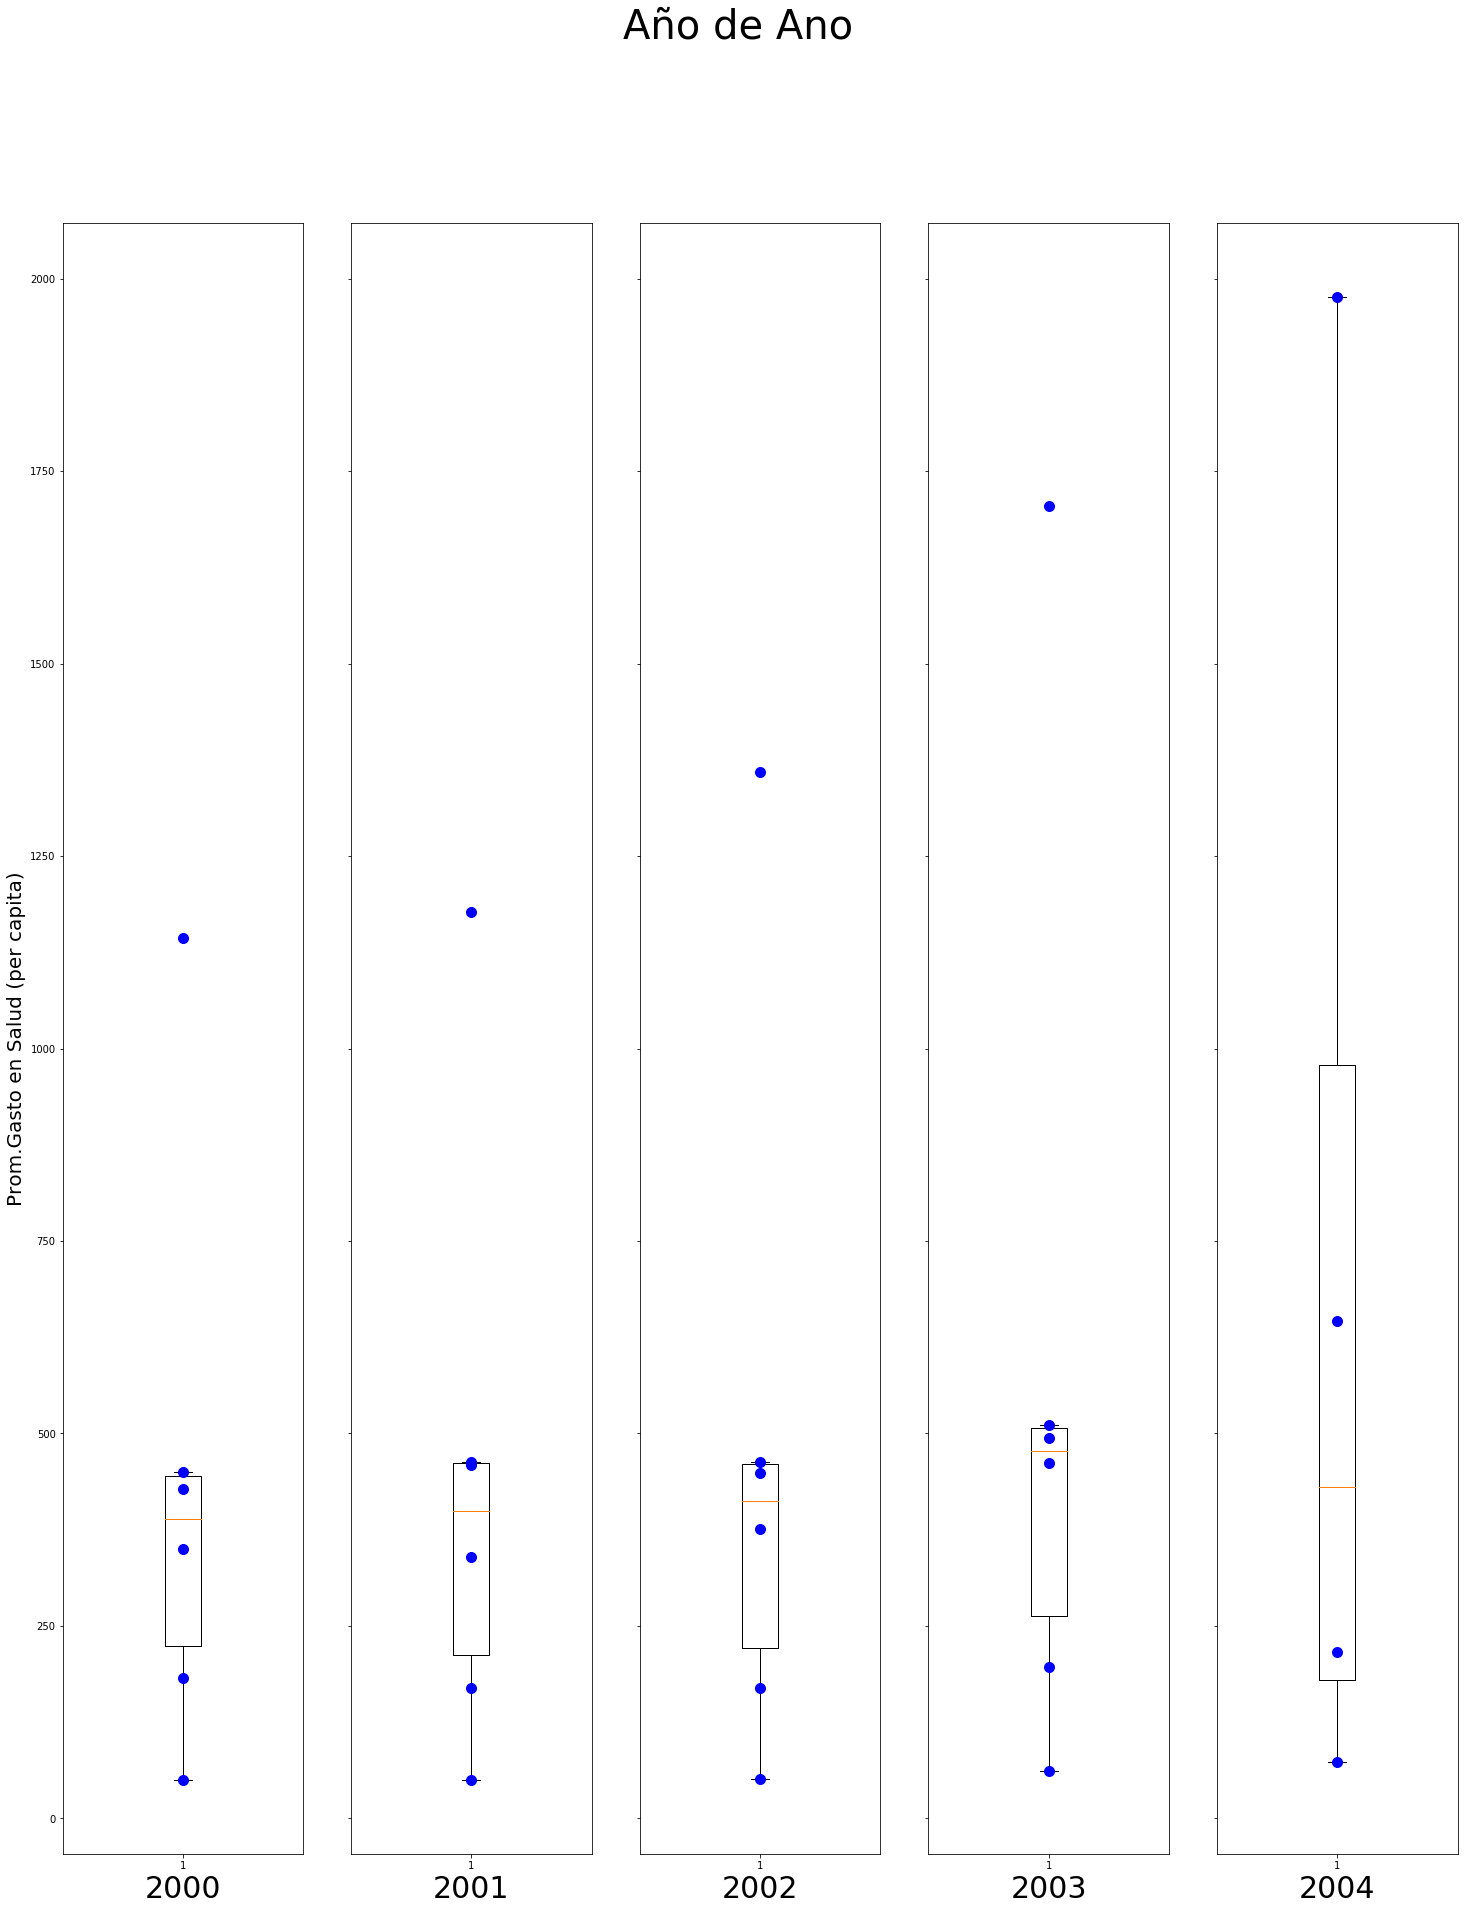

In [161]:
DataFrameGastosPerCapita = DataFrameSumaGastos.copy()
DataFrameGastosPerCapita = DataFrameGastosPerCapita.reset_index()
Years = (DataFrameGastosPerCapita['AnoUnico'].drop_duplicates())
Contador = 0
fig, axs = plt.subplots(1, len(Years),figsize=(25, 30), sharey=True)
for Year in Years:
    DataFramePerYear = DataFrameGastosPerCapita[DataFrameGastosPerCapita['AnoUnico']== Year]
    values = list(DataFramePerYear['Gasto en salud (per capita)'])
    axs[Contador].boxplot(values,0)
    axs[Contador].set_xlabel(Year,fontsize=30)
    for value in values:
        axs[Contador].plot(1 ,value, 'b.', marker="o",  markersize=10)
    Contador+=1
fig.suptitle('Año de Ano', fontsize=40)
axs[0].set_ylabel(ylabel='Prom.Gasto en Salud (per capita)',fontsize=20)

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

Text(0.5, 0.98, 'Region / Ano')

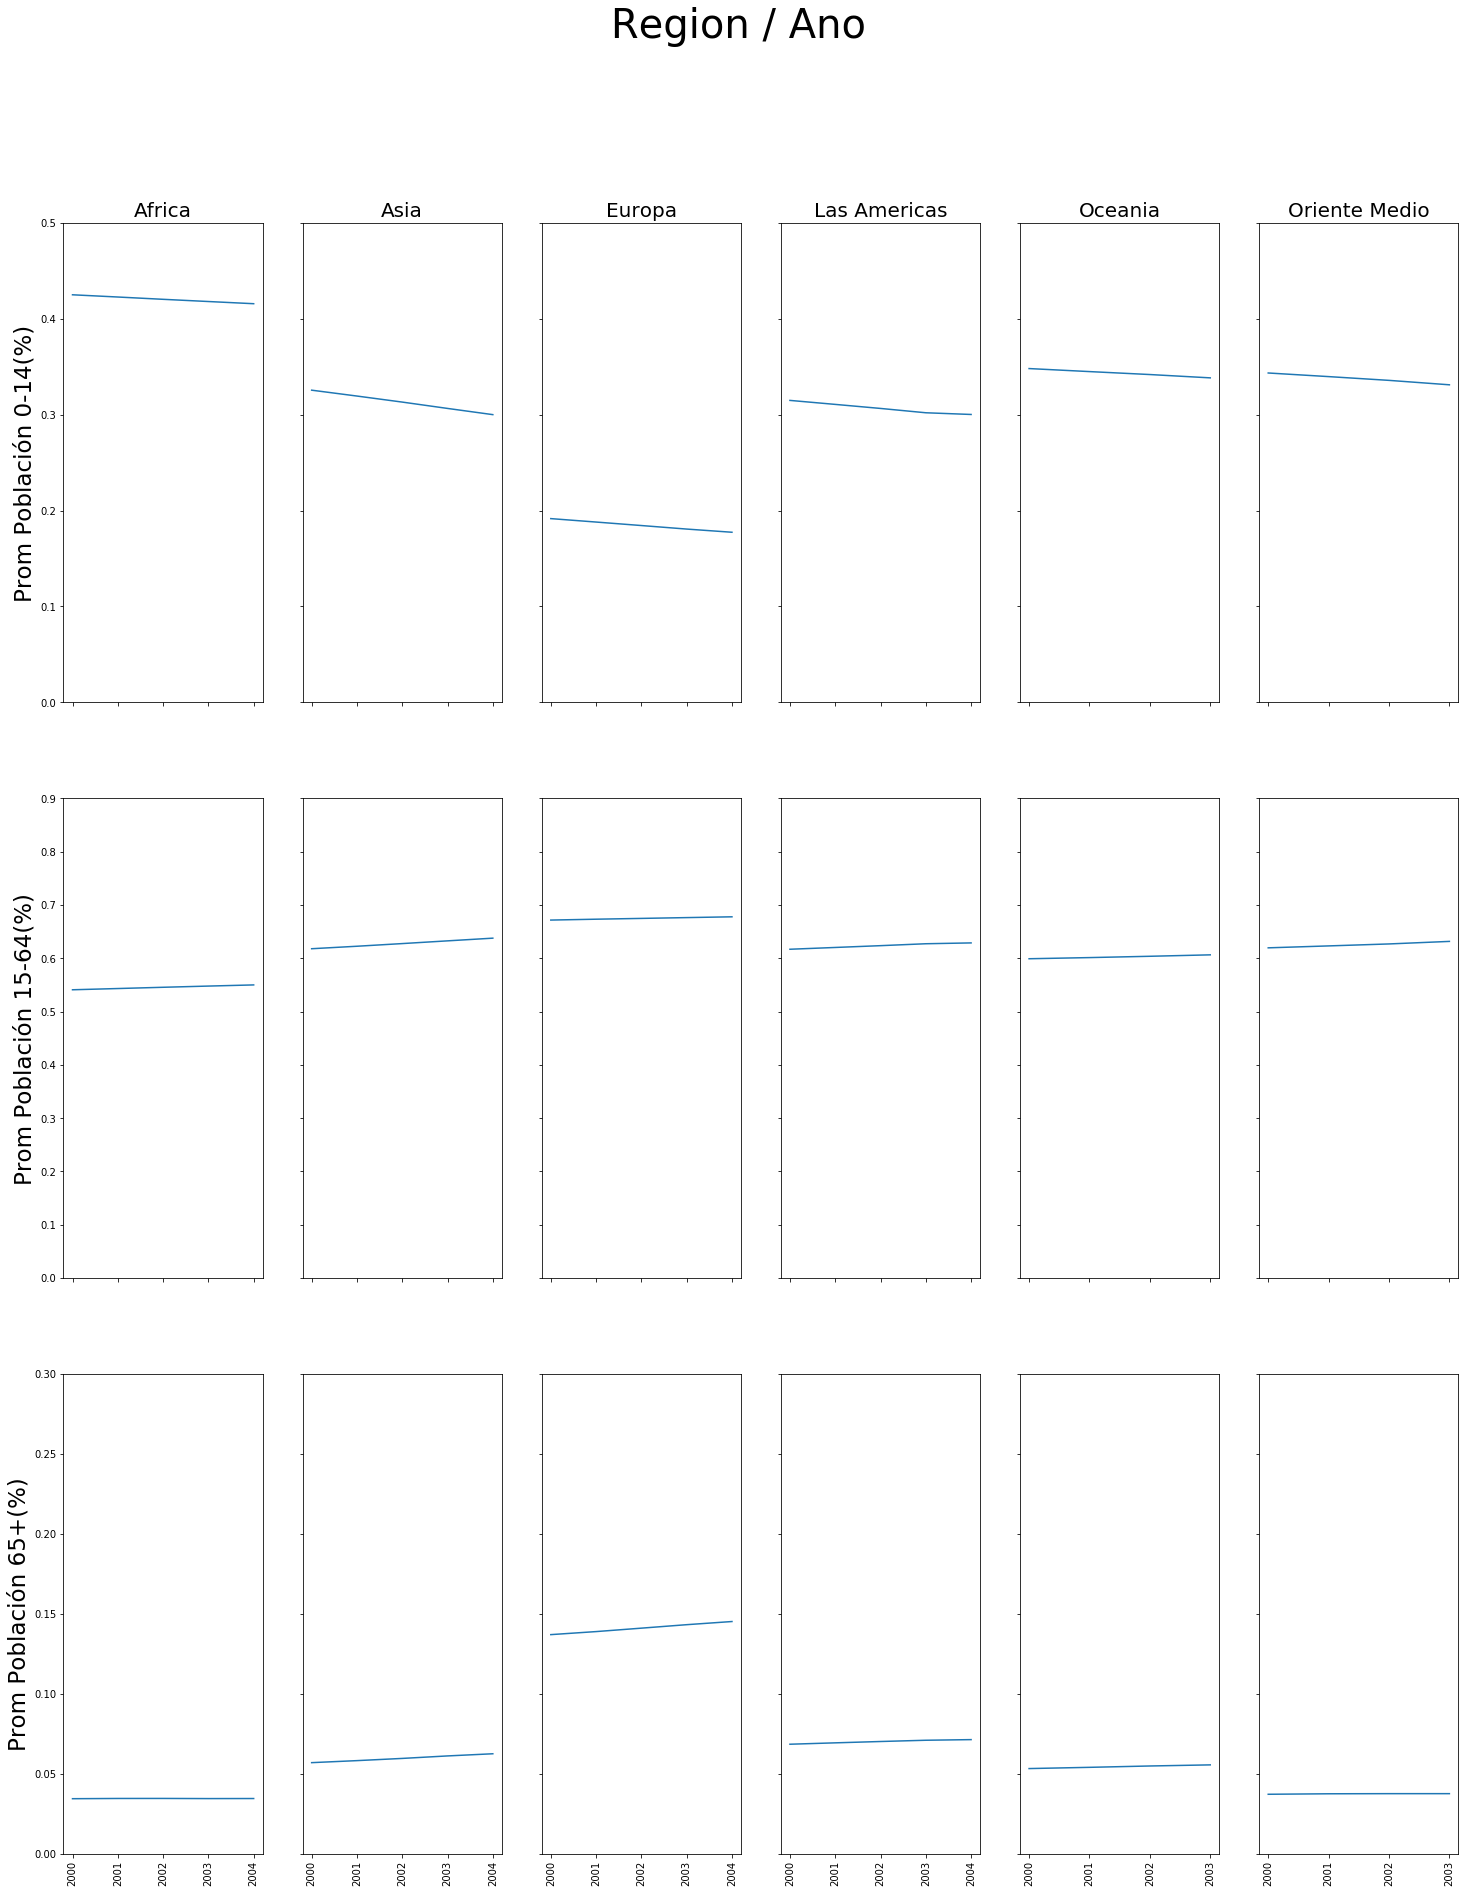

In [252]:
DataFrame14 = DataFrameDataFramePoblacionPromedio14.copy()
DataFrame64 = DataFrameDataFramePoblacionPromedio64.copy()
DataFrame65 = DataFrameDataFramePoblacionPromedio65.copy()

DataFrame14 = DataFrame14.reset_index()
DataFrame64 = DataFrame64.reset_index()
DataFrame65 = DataFrame65.reset_index()


RegionValues = (DataFrame14['Region'].drop_duplicates())
DataFrames = [DataFrame14,DataFrame64,DataFrame65]
fig, axs = plt.subplots(len(DataFrames), len(RegionValues),figsize=(25, 30))

def GraficarSubPlot(indiceColumna,indiceFila,Data,IndiceDeContenido,Region):
    names = Data[Data['Region'] == Region]
    names = list((names['AnoUnico'].drop_duplicates()))
    values= Data[Data['Region'] == Region]
    values = list(values[IndiceDeContenido]/100)
    axs[indiceColumna,indiceFila].plot(names, values)
    axs[indiceColumna,indiceFila].set_xticklabels(names, rotation=90)


contadorColumna = 0
for Region in RegionValues:
    contadorFila = 0
    axs[contadorFila,contadorColumna].set_title(Region,fontsize=20)
    for DataFramePoblacion in DataFrames:
        IndiceContenido = ""
        if(contadorFila ==0 ):
            IndiceContenido = "Poblacion 0-14"
        if(contadorFila ==1 ):
            IndiceContenido = "Poblacion 15-64"
        if(contadorFila ==2 ):
            IndiceContenido = "Poblacion 65+"                    
       
        GraficarSubPlot(contadorFila,contadorColumna,DataFramePoblacion,IndiceContenido,Region)
        contadorFila+=1
    contadorColumna+=1
    
for ax in fig.get_axes():
    ax.label_outer()
for i in range(0,6) :
    axs[0,i].set_ylim(bottom = 0,top=0.5)
for i in range(0,6) :
    axs[1,i].set_ylim(bottom = 0,top=0.9)
for i in range(0,6) :
    axs[2,i].set_ylim(bottom = 0,top=0.3)

axs[0,0].set_ylabel("Prom Población 0-14(%)",fontsize=23)
axs[1,0].set_ylabel("Prom Población 15-64(%)",fontsize=23)
axs[2,0].set_ylabel("Prom Población 65+(%)",fontsize=23)
fig.suptitle('Region / Ano', fontsize=40)

---